<a href="https://colab.research.google.com/github/ServusPacis10/myportfolio/blob/master/SentimentAnalysi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#description: This is a SA program for UK Government using Python


In [ ]:
pip install jsonpickle

In [ ]:
pip install afinn

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp36-none-any.whl size=53453 sha256=0c8153a06ef5c9540bc3557996fe56f13864d7b64568868e177aee25971c7284
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


In [7]:
# Import the libraries
import spacy
import csv
import nltk 
#from nltk.sentiment.vader import SentimentIntensityAnalyser 
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime
import jsonpickle
import time

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#load the keys
from google.colab import files
uploaded = files.upload()



In [ ]:
#Twitter API credentials pick-up
consumerKey = "CUimVJmMUQIiXooiaYSMifuLC"
consumerSecret = "AQsbZAVHgXS1ZM7UZNljjofS7mVcmzcEXQkrEYAThGQRn1mJWb"
accessToken = "241523154-igT7puZHQFZ9xSTkE8u0FhGzJz3MUQFW5IL6vqXR"
accessTokenSecret = "Z8G8okDdoRK9nnGzqq3cOyQBzgbf0tR2K0imVcpHCFifq"

In [ ]:
#Create Authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Set Access token and its secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Create API object while passing the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True, wait_on_rate_limit_notify= True)

In [ ]:
#Stream tweets from Twitter user or hashtags
#posts = api.user_timeline(screen_name ="BillGates", count = 100, lang ="eng", tweet_mode = "extended")
#for tweet in tweepy.Cursor(api.search,q="govUK",count=1000, since_id="2020-03-01", until="2020-08-01",
                      #lang="en",rpp=100).items():
    #for tweet in twepy.Cursor [0:10]:
       # print (tweet.created_at, tweet.text)

#csvFile = open('ua.csv', 'a')
#Use csv Writer
#csvWriter = csv.writer(csvFile)

#for tweet in tweepy.Cursor(api.search,q="#covid19UK",count=100,
             #              lang="en",
           #                since_id="2020-03-03").items():
    #print (tweet.created_at, tweet.text)
    #csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

In [ ]:
# Open/Create a file to append data
#csvFile = open('ua_1_2.csv', 'a')
#Use csv Writer
#csvWriter = csv.writer(csvFile)

#for tweet in tweepy.Cursor(api.search,q="#coronavirusUK OR #coronavirusuk OR #govUK OR #GovUK OR #BorisJohnson OR #nhsUK OR #nhsuk OR #covid19uk OR #covid19UK OR #ukcovid19 OR #UKGovernment OR #endlockdownuk OR #endLockdownUK OR #covid2019uk OR #covid2019UK",count=100,
               #            lang="en",
               #            date_since="2020-03-18").items():
    #print (tweet.created_at, tweet.text)
    #csvWriter.writerow([tweet['full_text'],tweet['retweet_count'],tweet['user']['followers_count'],tweet['favorite_count'],tweet['place'],tweet['coordinates'],tweet['geo'],tweet['created_at'],str(tweet['id_str'])])
    #csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

In [ ]:
#Data Collection 
tweetsPerQuery = 100 #this is the maximum provided by API
max_tweets = 100000000 # just for the sake of While loop
fName = 'tweets_002.txt' # where i save the tweets

# No sinceId and max_id ..Get whathever you have exhaustively
since_id = None
max_id = -1
tweet_count = 0
print("Downloading the tweeets..takes some time..")

search_query="#coronavirusUK OR #coronavirusuk OR #govUK OR #GovUK OR #BorisJohnson OR #nhsUK OR #nhsuk OR #covid19uk OR #covid19UK OR #ukcovid19 OR #UKGovernment OR #endlockdownuk OR #endLockdownUK OR #covid2019uk OR #covid2019UK"
x=0
with open(fName,'w') as f:
    print("Downloading hashtag" + search_query)
    while(tweet_count<max_tweets):
        try:
            if(max_id<=0):
                if(not since_id):
                    new_tweets = api.search(q=search_query,count=tweetsPerQuery,lang="en",tweet_mode='extended')

                else:
                    new_tweets = api.search(q=search_query,count=tweetsPerQuery,lang="en",tweet_mode='extended',since_id=since_id)
            else:
                if(not since_id):
                    new_tweets = api.search(q=search_query,count=tweetsPerQuery,lang="en",tweet_mode='extended',max_id=str(max_id-1))
                else:
                    new_tweets = api.search(q=search_query,count=tweetsPerQuery,lang="en",tweet_mode='extended',max_id=str(max_id-1),since_id=since_id)

            # Tweets Exhausted
            if(not new_tweets):
                print("No more tweets found!!")
                break
            # write all the new_tweets to a json file
            for tweet in new_tweets:
                f.write(jsonpickle.encode(tweet._json,unpicklable=False)+'\n')
                tweet_count+=len(new_tweets)
                print("Successfully downloaded {0} tweets".format(tweet_count))
                max_id=new_tweets[-1].id
        # in case of any error
        except tweepy.TweepError as e:
                print("Some error!!:"+str(e))
                break
end = time.time()

print("A total of {0} tweets are downloaded and saved to {1}".format(tweet_count,fName))
print("Total time taken is ",end-st,"seconds.")

In [ ]:
#json tesxt to csv for easy analysis
import time 
import json

f = open('tweets_004.csv','a',encoding='utf-8')
csvWriter = csv.writer(f)
headers=['full_text','retweet_count','user_followers_count','favorite_count','place','coordinates','geo','created_at','id_str']
csvWriter.writerow(headers)

for inputFile in [ 'tweets_001.txt','tweets_002.txt']:#all the text-file names you want to convert to Csv in the sae folder as this code
    tweets = []
    for line in open(inputFile, 'r'):
        tweets.append(json.loads(line))

    print('HI',len(tweets))
    count_lines=0
    for tweet in tweets:
        try:
            csvWriter.writerow([tweet['full_text'],tweet['retweet_count'],tweet['user']['followers_count'],tweet['favorite_count'],tweet['place'],tweet['coordinates'],tweet['geo'],tweet['created_at'],str(tweet['id_str'])])
            count_lines+=1
        except Exception as e:
            print(e)
    print(count_lines)

HI 32824
32824
HI 61178
61178


In [ ]:
import pandas as pd
df = pd.read_csv('tweets_002.csv', encoding = 'unicode_escape')
#full_text is fine

df_copy = df
print(len(df_copy))
serlis=df_copy.duplicated().tolist()
print(serlis.count(True)) #7479

serlis=df_copy.duplicated(['full_text']).tolist()
print(serlis.count(True))

65646
32711
53562


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,5,6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
from nltk.corpus import sentiwordnet as swn
from nltk.tag import pos_tag,map_tag
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

pstem = PorterStemmer()
lem = WordNetLemmatizer()
stop_words = stopwords.words('english')

def clean_df(df_copy):
    
    #DROPS
    #CHOOSE EITHER TO DROP ALL-ROW DUPLICATES OR FULL_TEXT DUPLICATES
    df_copy=df_copy.drop_duplicates(['full_text']) #number left after this
    df_copy=df_copy.reset_index(drop=True)
    df_copy=df_copy.drop(['place','coordinates','geo','id_str'],axis=1)
    #df_copy=
    
    # BASIC CLEANING FUNCTION
    for i in range(len(df_copy)):
        txt = df_copy.loc[i]["full_text"]
        txt=re.sub(r'@[A-Z0-9a-z_:]+','',txt) #username-tags
        txt=re.sub(r'^[RT]+','',txt) #RT-tags
        txt = re.sub('https?://[A-Za-z0-9./]+','',txt) #URLs
        txt=re.sub("[^a-zA-Z]", " ",txt) #hashtags
        df_copy.at[i,"full_text"]=txt
    #POS-TAGGING AND SENTIMENT SCORE
    li_swn=[]
    li_swn_pos=[]
    li_swn_neg=[]
    missing_words=[]
    for i in range(len(df_copy.index)):
        text = df_copy.loc[i]['full_text']
        tokens = nltk.word_tokenize(text)
        tagged_sent = pos_tag(tokens)
        store_it = [(word, map_tag('en-ptb', 'universal', tag)) for word, tag in tagged_sent]
        #print("Tagged Parts of Speech:",store_it)

        pos_total=0
        neg_total=0
        for word,tag in store_it:
            if(tag=='NOUN'):
                tag='n'
            elif(tag=='VERB'):
                tag='v'
            elif(tag=='ADJ'):
                tag='a'
            elif(tag=='ADV'):
                tag = 'r'
            else:
                tag='nothing'

            if(tag!='nothing'):   
                concat = word+'.'+tag+'.01'
                try:
                    this_word_pos=swn.senti_synset(concat).pos_score()
                    this_word_neg=swn.senti_synset(concat).neg_score()
                    #print(word,tag,':',this_word_pos,this_word_neg)
                except Exception as e:
                    wor = lem.lemmatize(word)
                    concat = wor+'.'+tag+'.01'
                    # Checking if there's a possiblity of lemmatized word be accepted into SWN corpus
                    try:
                        this_word_pos=swn.senti_synset(concat).pos_score()
                        this_word_neg=swn.senti_synset(concat).neg_score()
                    except Exception as e:
                        wor = pstem.stem(word)
                        concat = wor+'.'+tag+'.01'
                        # Checking if there's a possiblity of lemmatized word be accepted
                        try:
                            this_word_pos=swn.senti_synset(concat).pos_score()
                            this_word_neg=swn.senti_synset(concat).neg_score()
                        except:
                            missing_words.append(word) 
                            continue
                pos_total+=this_word_pos
                neg_total+=this_word_neg
        li_swn_pos.append(pos_total)
        li_swn_neg.append(neg_total)

        if(pos_total!=0 or neg_total!=0):
            if(pos_total>neg_total):
                li_swn.append(1)
            else:
                li_swn.append(-1)
        else:
            li_swn.append(0)
    # end-of pos-tagging&sentiment
    
    #3-rd for loop    
    #LEMMATIZING,STEMMING,STOP-WORDS
    for i in range(len(df_copy.index)):
        text = df_copy.loc[i]['full_text']
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stop_words]

        for j in range(len(tokens)):
            tokens[j] = lem.lemmatize(tokens[j])
            tokens[j] = pstem.stem(tokens[j])

        tokens_sent=' '.join(tokens)
        df_copy.at[i,"full_text"] = tokens_sent
        
    df_copy.insert(5,"pos_score",li_swn_pos,True)
    df_copy.insert(6,"neg_score",li_swn_neg,True)
    df_copy.insert(7,"sent_score",li_swn,True)
    
    
    
    return df_copy

st=time.time()
df_copy = clean_df(df_copy)
end=time.time()

# df_copy.loc[4]
print(end-st)#
# df_copy
# takes(no senti) 0.7440352439880371 with txt less..so go with it
# takes(no senti) 3.600219488143921 with df_copy.loc


195.03424167633057


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#TextBlob SENTIMENT LABELING
#from textblob import TextBlob
count_total=0
count_pos=0
count_neg=0
count_neut=0

li_tb = []
for i in range(len(df.index)):
    sent = TextBlob(str(df.loc[i]['full_text']))
    if(sent.sentiment.polarity>0):
        count_pos=count_pos+1
        count_total=count_total+1
        li_tb.append(1)
    elif(sent.sentiment.polarity<0):
        count_neg=count_neg+1
        count_total=count_total+1
        li_tb.append(-1)
    else:
        li_tb.append(0)
        count_neut+=1

        count_total=count_total+1


#         print(df.loc[i]['full_text'])
#         print(sent.sentiment)
print("Total tweets:",len(df.index))
print("Total tweets with sentiment:",count_total)
print("positive tweets:",count_pos)
print("negative tweets:",count_neg)
print("neutral tweets:",count_neut)

Total tweets: 65646
Total tweets with sentiment: 65646
positive tweets: 24390
negative tweets: 13700
neutral tweets: 27556


In [ ]:
pip install afinn


     |████████████████████████████████| 61kB 1.6MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp36-none-any.whl size=53453 sha256=a33a4b481162de4b11bacae9676e6c459d8732607f4ae7687a218fda8001b0a0
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


In [ ]:
# Afinn sentiment LABELING

from afinn import Afinn
from nltk.corpus import gutenberg
import textwrap
af = Afinn()
count_total=0
count_pos=0
count_neut=0

count_neg=0
li_af = []
for i in range(len(df.index)):
    sent = str(df.loc[i]['full_text'])
    if(af.score(sent)>0):
        count_pos=count_pos+1
        count_total=count_total+1
        li_af.append(1)
    elif(af.score(sent)<0):
        count_neg=count_neg+1
        count_total=count_total+1
        li_af.append(-1)
    else:
        li_af.append(0)
        count_total=count_total+1
        count_neut+=1



#         print(df.loc[i]['full_text'])
#         print(sent.sentiment)
print("Total tweets:",len(df.index))
print("Total tweets with sentiment:",count_total)
print("positive tweets:",count_pos)
print("negative tweets:",count_neg)
print("neutral tweets:",count_neut)

Total tweets: 65646
Total tweets with sentiment: 65646
positive tweets: 18112
negative tweets: 27351
neutral tweets: 20183


In [ ]:
df_copy

,full_text,retweet_count,user_followers_count,favorite_count,created_at,pos_score,neg_score,sent_score
0,full text,retweet_count,user_followers_count,favorite_count,created_at,0,0,0
1,patrick blower govern muddl coronaviru messag ...,7,108,0,Tue Aug 25 01:00:21 +0000 2020,0,0,0
2,love trump borisjohnson scottmorrison auspol,0,2991,3,Tue Aug 25 00:57:02 +0000 2020,0,0,0
3,Me go shop coronavirusuk,147,8,0,Tue Aug 25 00:49:13 +0000 2020,0,0,0
4,RT think Dr jenni harri menac public health sa...,2385,1640,0,Tue Aug 25 00:46:52 +0000 2020,0,0,0
...,...,...,...,...,...,...,...,...
12079,heartless whisper like Gr wormtongu borisjohns...,0,31,0,Sun Aug 16 09:20:22 +0000 2020,0,0,0
12080,So eloqu put wish well your gener sever let in...,0,218,1,Sun Aug 16 08:24:55 +0000 2020,0,0,0
12081,the alevelresult grade algorithm publish full ...,0,15,0,Sun Aug 16 08:10:26 +0000 2020,0,0,0
12082,mayb need doubl guilt campaign covid UK nolock...,5,402,0,Sun Aug 16 07:39:13 +0000 2020,0,0,0


In [ ]:
#copy the above dataframe into a new csv file
df_copy.to_csv('tweets_cleaned.csv',index=False)

In [8]:
#read the new csv file and make use of
df_copy = pd.read_csv('cleaned_tweets.csv',index_col=False)

In [ ]:
df_copy

,full_text,retweet_count,user_followers_count,favorite_count,created_at,pos_score,neg_score,sent_score
0,full text,retweet_count,user_followers_count,favorite_count,created_at,0.0,0.000,0
1,patrick blower govern muddl coronaviru messag ...,7,108,0,Tue Aug 25 01:00:21 +0000 2020,0.0,0.000,0
2,love trump borisjohnson scottmorrison auspol,0,2991,3,Tue Aug 25 00:57:02 +0000 2020,0.5,0.000,1
3,Me go shop coronavirusuk,147,8,0,Tue Aug 25 00:49:13 +0000 2020,0.0,0.000,0
4,RT think Dr jenni harri menac public health sa...,2385,1640,0,Tue Aug 25 00:46:52 +0000 2020,1.0,0.375,1
...,...,...,...,...,...,...,...,...
46644,nh england report death today happen last day ...,6,40,0,Mon Aug 31 19:34:42 +0000 2020,0.0,0.000,0
46645,school england receiv covid test kit ahead sta...,40,3092,0,Mon Aug 31 19:31:47 +0000 2020,0.0,0.000,0
46646,hroughout scotland must continu cautiou restri...,1,3941,0,Mon Aug 31 19:30:00 +0000 2020,0.0,0.000,0
46647,faceshield baseballcap gt manufactur capac per...,2,1722,4,Mon Aug 31 19:30:00 +0000 2020,0.0,0.000,0


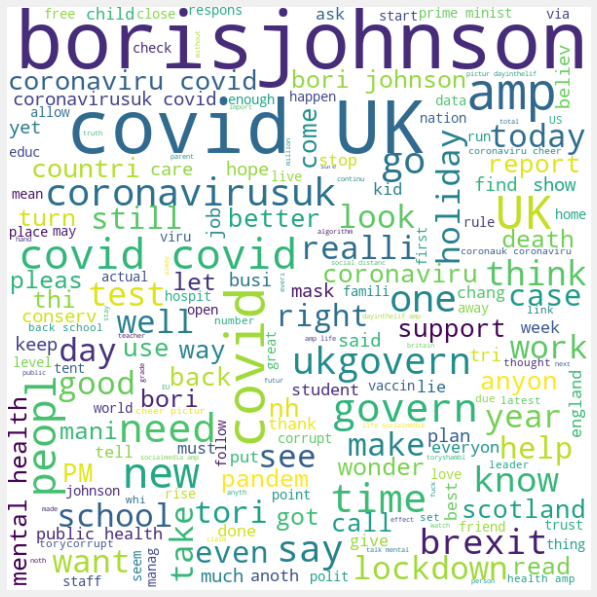

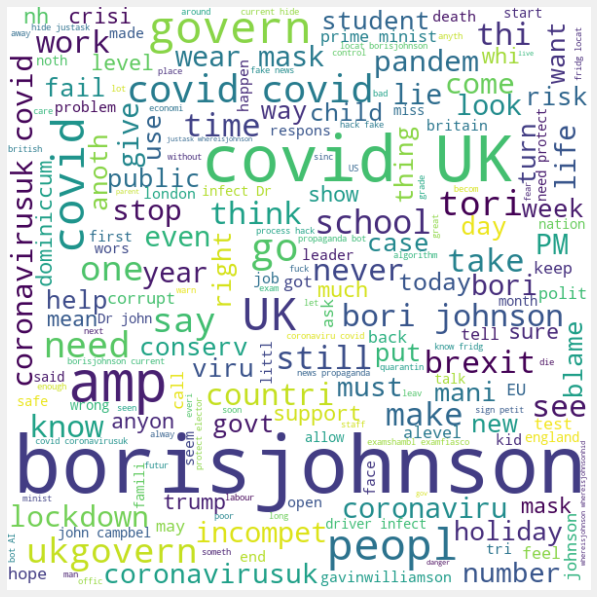

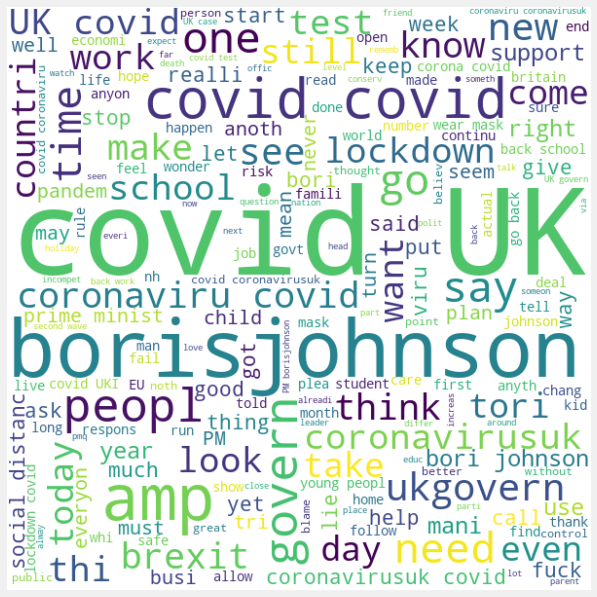

In [ ]:
#Word Clouding
# GENERATE POSITIVE TEXT,NEGATIVE TEXT,NEUTRAL TEXT FOR DATA-VISUALISATION
pos_text=""
neg_text=""
neut_text=""

for i in range(len(df_copy.index)):
    if(df_copy.loc[i]["sent_score"]==1):
        pos_text+=df_copy.loc[i]["full_text"]
    elif(df_copy.loc[i]["sent_score"]==-1):
        neg_text+=df_copy.loc[i]["full_text"]
    else:
        neut_text+=str(df_copy.loc[i]["full_text"])

list_text = [pos_text,neg_text,neut_text]


for txt in list_text:
    word_cloud = WordCloud(width = 600,height = 600,max_font_size = 200, background_color = "white").generate(txt)
    plt.figure(figsize=(12,10))# create a new figure
    plt.imshow(word_cloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [9]:
#Data Splitting in test and train datasets
import sklearn
from sklearn.model_selection import train_test_split
SEED =4

x = df_copy.full_text
y = df_copy.sent_score

x_train,x_val_test,y_train,y_val_test = train_test_split(x,y,test_size=0.1,random_state=SEED)
x_val,x_test,y_val,y_test = train_test_split(x_val_test,y_val_test,test_size=0.5,random_state=SEED)

x_train_copy = x_train
y_train_copy = y_train
x_val_copy = x_val
y_val_copy = y_val
print(len(x_train),len(x_test),len(x_val))

41984 2333 2332


In [10]:
#Vectorizing 1
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(decode_error='ignore',lowercase=False,max_features=11)
x_traincv=cv.fit_transform(x_train.values.astype('U'))

[('UK', 18865), ('borisjohnson', 15249), ('coronavirusuk', 5535), ('amp', 5036), ('peopl', 4899), ('coronaviru', 4726), ('govern', 3683), ('the', 3425), ('go', 3247), ('get', 3121)]


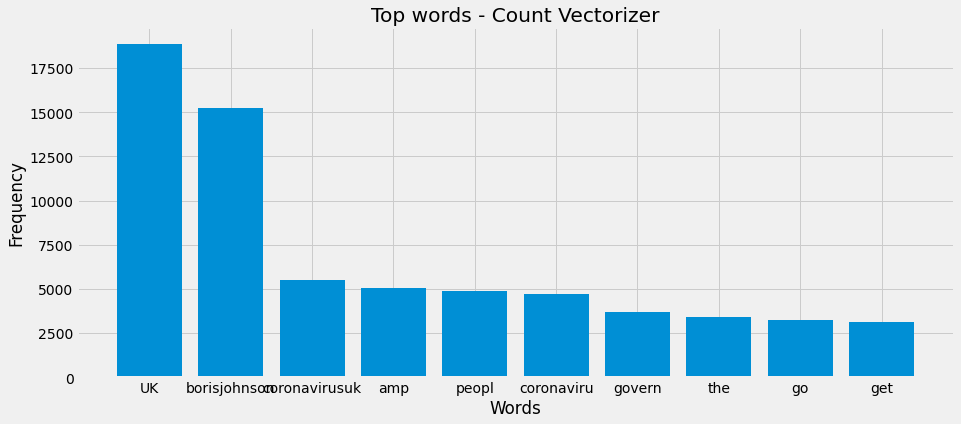

In [11]:
#Count vectorizer
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(decode_error='ignore',lowercase=False,max_features=11)
x_traincv=cv.fit_transform(x_train.values.astype('U'))
top_sum=x_traincv.toarray().sum(axis=0)
top_sum_cv=[top_sum]#to let pandas know that these are rows
columns_cv = cv.get_feature_names()
x_traincvdf = pd.DataFrame(top_sum_cv,columns=columns_cv)


import operator
dic = {}
for i in range(len(top_sum_cv[0])):
    dic[columns_cv[i]]=top_sum_cv[0][i]
sorted_dic=sorted(dic.items(),reverse=True,key=operator.itemgetter(1))
print(sorted_dic[1:])
bins = [w for w,v in sorted_dic][1:]#slicing to delete the first swachh bharat
freq = [v for w,v in sorted_dic][1:]
from matplotlib import pyplot as plt

plt.figure(figsize=(14,6))
plt.bar(bins,freq)
plt.xlabel('Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top words - Count Vectorizer')
plt.show()

In [12]:
#Vectorization 2
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(decode_error='ignore',lowercase=False,max_features=11)
x_traintf=tf.fit_transform(x_train_copy.values.astype('U'))

[('covid', 11141.823208995764), ('UK', 9061.196467655564), ('coronavirusuk', 3792.218869742499), ('peopl', 2985.713237370193), ('amp', 2934.595290900499), ('coronaviru', 2703.767557517549), ('govern', 2460.8567748622218), ('the', 2378.8583821264747), ('go', 2077.1557962611637), ('get', 2041.7428272298753)]


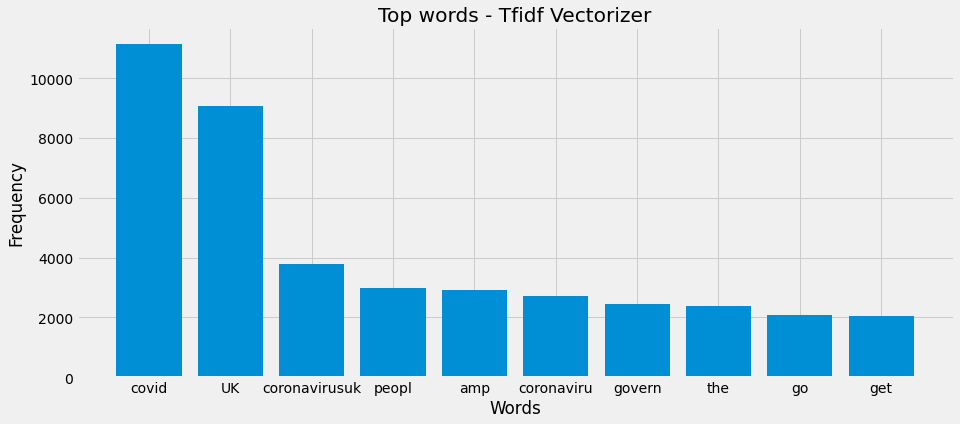

In [13]:
# tfidf top words

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(decode_error='ignore',lowercase=False,max_features=11)
x_traintf=tf.fit_transform(x_train.values.astype('U'))
top_sum=x_traintf.toarray().sum(axis=0)
top_sum_tf=[top_sum]#to let pandas know that these are rows
columns_tf = tf.get_feature_names()
x_traintfdf = pd.DataFrame(top_sum_tf,columns=columns_tf)


import operator
dic = {}
for i in range(len(top_sum_tf[0])):
    dic[columns_tf[i]]=top_sum_tf[0][i]
sorted_dic=sorted(dic.items(),reverse=True,key=operator.itemgetter(1))
print(sorted_dic[1:])
bins = [w for w,v in sorted_dic][1:]#slicing to delete the first swachh bharat
freq = [v for w,v in sorted_dic][1:]
from matplotlib import pyplot as plt

plt.figure(figsize=(14,6))
plt.bar(bins,freq)
plt.xlabel('Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top words - Tfidf Vectorizer')
plt.show()

In [ ]:
#Classificationns based on all classifiers
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import cross_validate,KFold
import datetime
import time
import pandas as pd
#a list of classes
classifiers = [MultinomialNB(),BernoulliNB(),LogisticRegression(),LinearSVC(),AdaBoostClassifier(),RidgeClassifier(),PassiveAggressiveClassifier(),Perceptron(),RandomForestClassifier()]
clf_names = ['MultinomialNB()','BernoulliNB()','LogisticRegression()','LinearSVC()','AdaBoostClassifier()','RidgeClassifier()','PassiveAggressiveClassifier()','Perceptron()','RandomForest Classifier']
data=[]

for v in ['cv','tf']:

    for gram in range(1,4):
        i=0

        for clf in classifiers:
            
            if(clf=='RandomForest Classifier'):#special case
                clf = RandomForestClassifier(random_state=0,n_jobs=-1,class_weight="balanced")

            before = datetime.datetime.now()
            before = before.strftime("%H:%M:%S")
            start = time.time()
            
            if(v=='cv'):
                vec = TfidfVectorizer(ngram_range=(1,gram))
            else:
                vec = CountVectorizer(ngram_range=(1,gram))
                
            model = make_pipeline(vec,clf)
            model.fit(x_train_copy.values.astype('U'),y_train_copy.values.astype('U'))##
            labels = model.predict(x_val_copy.values.astype('U'))
            ac = accuracy_score(y_val_copy.values.astype('U'),labels)
            kfold = KFold(n_splits=10,shuffle=False,random_state=None)
            results = cross_validate(model,x_train_copy.values.astype('U'),y_train_copy.values.astype('U'),cv=kfold)
            crossval_test_score_mean=results['test_score'].mean()
            crossval_train_score_mean="" #results['train_score'].mean()
            crossval_test_score_std=results['test_score'].std()
            crossval_train_score_std="" #results['train_score'].std()
            after = datetime.datetime.now()
            after = after.strftime("%H:%M:%S")
            end = time.time()
            hours = int(after[0:2])-int(before[0:2])
            mins = int(after[3:5])-int(before[3:5])
            secs = int(after[6:8])-int(before[6:8])
            time_taken = str(hours)+":"+str(mins)+":"+str(secs)
            gr = str(gram)
            vec_gram = v+"_"+gr
            data.append([vec_gram,clf_names[i],ac,crossval_train_score_mean,crossval_test_score_mean,crossval_train_score_std,crossval_test_score_std, end-start])
            i+=1
#     data.append([0,0,0,0,0,0,0,0])
d = pd.DataFrame(data,columns=['Vec_Gram','Classifier','Ac','crossval_train_score_mean','crossval_test_score_mean','crossval_train_score_std','crossval_test_score_std','Time.2'])
        
#         d['Ac_rank'] = d['Ac'].rank(ascending=False)
#         d['Time_rank'] = d['Time.2'].rank(ascending=False)
#         d['C-rank'] = d['Ac_rank'] + d['Time_rank']
#         d['C-rank'] = d['C-rank'].rank(ascending=False)

print(d)
        
fname = "tweets_classified.csv"
d.to_csv(fname)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [15]:
#Compute the negative neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

#assign scores and analysis
df_copy['Analysis'] = df_copy['sent_score'].apply(getAnalysis)

#show dataframe
df_copy

,full_text,retweet_count,user_followers_count,favorite_count,created_at,pos_score,neg_score,sent_score,Analysis
0,full text,retweet_count,user_followers_count,favorite_count,created_at,0.0,0.000,0,Neutral
1,patrick blower govern muddl coronaviru messag ...,7,108,0,Tue Aug 25 01:00:21 +0000 2020,0.0,0.000,0,Neutral
2,love trump borisjohnson scottmorrison auspol,0,2991,3,Tue Aug 25 00:57:02 +0000 2020,0.5,0.000,1,Positive
3,Me go shop coronavirusuk,147,8,0,Tue Aug 25 00:49:13 +0000 2020,0.0,0.000,0,Neutral
4,RT think Dr jenni harri menac public health sa...,2385,1640,0,Tue Aug 25 00:46:52 +0000 2020,1.0,0.375,1,Positive
...,...,...,...,...,...,...,...,...,...
46644,nh england report death today happen last day ...,6,40,0,Mon Aug 31 19:34:42 +0000 2020,0.0,0.000,0,Neutral
46645,school england receiv covid test kit ahead sta...,40,3092,0,Mon Aug 31 19:31:47 +0000 2020,0.0,0.000,0,Neutral
46646,hroughout scotland must continu cautiou restri...,1,3941,0,Mon Aug 31 19:30:00 +0000 2020,0.0,0.000,0,Neutral
46647,faceshield baseballcap gt manufactur capac per...,2,1722,4,Mon Aug 31 19:30:00 +0000 2020,0.0,0.000,0,Neutral


In [16]:
#Print all of the positive tweets
j = 1
#Sort values by polarity
sortedDF = df_copy.sort_values(by = ['sent_score'])

for i in range(0, sortedDF.shape[0]): #Number of rows 

#To print only the positive tweets
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['full_text'][i]) 
    print()
    j = j+1


Streaming output truncated to the last 5000 lines.

2829) britain truli broken reflect public mood you need polit prefer understand borisjohnson patent worst person lead britain multipl crisi let alon covid brexit crash economi

2830) thi march th tweet possibl accur predict ever one level

2831) love trust huge major He lead starmer point best choic PM ye thirteen point So right wrong poll enjoy borisjohnson backbori bori starmer keir starmer

2832) support scottish independ hit new poll despit bori johnson push promot union borisjohnson brexitr takebackcontrol tori nicolasturgeon scotland dominiccum

2833) ration german scientist Dr sucharit bhakdi corona mad covid UK nonewnorm

2834) can prove differ ukgovern would done better job look forward hear P S pleas repli proof use hindsight

2835) over year inequ respons time life expect loss worst case complet unmiti

2836) In past year bori johnson overseen bitter gener elect campaign spring budget summer statement unpreced packag financ

In [17]:
#print the negative tweets
j = 1
sortedDF_2 = df_copy.sort_values(by=['sent_score'], ascending='False') #Sorting in descending order
for i in range (0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+ sortedDF['full_text'][i])
    print()
    j = j+1

Streaming output truncated to the last 5000 lines.

2888) So that discount compar eat busi rate holiday month salari work not much incent return averag product experi railfar covid UK

2889) borishasfailedtheuk continu use doubl violenc protest face racialinjustic UK the reason claim sever insist widespread send riotgear US borisjohnson blacklivesmatt chicago

2890) just stop follow diktat need govt meant serv way around covid UK KB

2891) break I abl indic today move phase rout map lockdown ph

2892) they seem mention mask lockdown vaccin nh websit treatment covid corona coronav

2893) sudden absenc borisjohnson remind U S govern attempt cover trump blatant weak ill wheresbori trumpisnotwel

2894) commun age coronaviru base survey nh commun covid uk pandem recent report highlight key find commun fundament strateg function

2895) school exam act advic given teach union amp ofqual He deepli sorri fg

2896) like small child think close eye see alevelresult coronavirusuk

2897) are find w

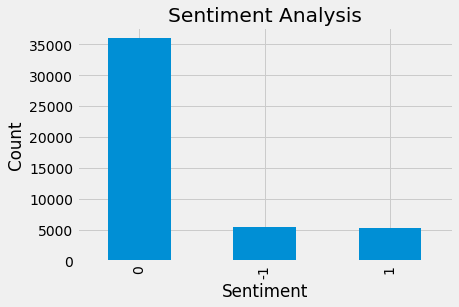

ValueError: ignored

In [21]:
#show the value counts
df_copy['sent_score'].value_counts()

#visualize counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')

#plot aas bar chart
df_copy['sent_score'].value_counts().plot(kind ='bar')
plt.show()

#plot aas bar chart
df_copy['sent_score'].value_counts().plot(kind ='scatter')
plt.show()
